In [89]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

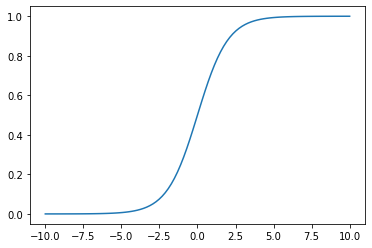

In [90]:
t = np.linspace(-10, 10, 100)

sigmoid = 1 / (1 + np.exp(-t))

plt.plot(t, sigmoid)

In [91]:
logits = [2.0, 1.0, 0.1]
import numpy as np
exps = [np.exp(i) for i in logits]
sum_of_exps = sum(exps)
softmax = [j/sum_of_exps for j in exps]

In [92]:
softmax

[0.6590011388859679, 0.2424329707047139, 0.09856589040931818]

<ipython-input-93-0d56e4917dbd>:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris["target"] == 2).astype(np.int)
No handles with labels found to put in legend.


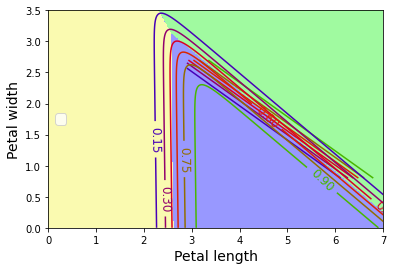

In [93]:
from sklearn.linear_model import LogisticRegression


from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int)

log_reg = LogisticRegression(solver="lbfgs", C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)


x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

# plt.figure(figsize=(10, 4))
# plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
# plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
# plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
# save_fig("softmax_regression_contour_plot")
plt.show()

In [94]:
from math import log10

In [95]:
softmax[0]

0.6590011388859679

In [96]:
from math import log10

cross_entropy = -log10(softmax[0]) + -log10(softmax[1]) + -log10(softmax[2])
cross_entropy

1.8027955020918893

# Code for Chapter 4

In [97]:
import numpy as np

X = 2 * np.random.rand(1000, 1)
y = 4 + 3 * X + np.random.randn(1000, 1)

(0.0, 2.0, 0.0, 15.0)

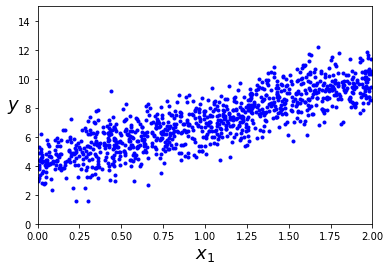

In [98]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])

In [99]:
X_b = np.c_[np.ones((1000, 1)), X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [100]:
theta_best

array([[4.12490943],
       [2.91748654]])

In [101]:
np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

array([[4.12490943],
       [2.91748654]])

In [102]:
import numpy as np
import time

def test_comp(x):
    start = time.time()
    X = 2 * np.random.rand(x, 1)
    y = 4 + 3 * X + np.random.randn(x, 1)

    X_b = np.c_[np.ones((x, 1)), X]  # add x0 = 1 to each instance
    theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

    end = time.time()

    the_time = end - start

    return the_time

In [103]:
test_comp(10000)/test_comp(1000)

1.6474057782665201

In [104]:
test_comp(100000)/test_comp(10000)

10.798783759613665

In [105]:
test_comp(1000000)/test_comp(100000)

15.636433159987764

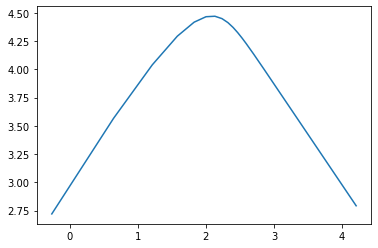

In [138]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance

eta = 0.1  # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)  # random initialization

theta_graph = []
theta_graph.append(theta)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    theta_graph.append(theta)

x = [i[0][0] for i in theta_graph]
y = [i[1][0] for i in theta_graph]

plt.plot(x, y)X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

In [141]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)

theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)


np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

# save_fig("gradient_descent_plot")
plt.show()

ValueError: x and y must have same first dimension, but have shapes (100, 1) and (1001,)